In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json


In [2]:
import json
datastore = []
for line in open('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json','r'):
    datastore.append(json.loads(line))

In [3]:
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
print(sentences[0])
print(labels[0])

former versace store clerk sues over secret 'black code' for minority shoppers
0


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import  Tokenizer
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


In [6]:
vocab_size = 10000
max_length = 50
embedding_dim = 200 
padd_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29656


In [7]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,maxlen = max_length,padding = padd_type, truncating = trunc_type )

In [8]:
print(type(padded))

<class 'numpy.ndarray'>


In [9]:
labels = np.array(labels)
print(type(labels))

<class 'numpy.ndarray'>


In [10]:
from keras.layers import *

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(128,return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           2000000   
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 64)            64064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 11, 128)           98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 24)                1

In [13]:
num_epochs = 10
history = model.fit(padded, labels,epochs = num_epochs, verbose = 1,validation_split = 0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/10
21367/21367 [==============================] - 34s 2ms/sample - loss: 0.4216 - accuracy: 0.8034 - val_loss: 0.3417 - val_accuracy: 0.8534
Epoch 2/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.1887 - accuracy: 0.9298 - val_loss: 0.3720 - val_accuracy: 0.8474
Epoch 3/10
21367/21367 [==============================] - 29s 1ms/sample - loss: 0.0665 - accuracy: 0.9765 - val_loss: 0.4835 - val_accuracy: 0.8487
Epoch 4/10
21367/21367 [==============================] - 29s 1ms/sample - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.8273 - val_accuracy: 0.8429
Epoch 5/10
21367/21367 [==============================] - 28s 1ms/sample - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.8971 - val_accuracy: 0.8424
Epoch 6/10
21367/21367 [==============================] - 29s 1ms/sample - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.6406 - val_accuracy: 0.8433
Epoch 7/10
21367/21367 [==============================] -

In [14]:
print(history.history['val_accuracy'][9])
print(history.history['val_loss'][9])

0.8440659
0.9363307136134323


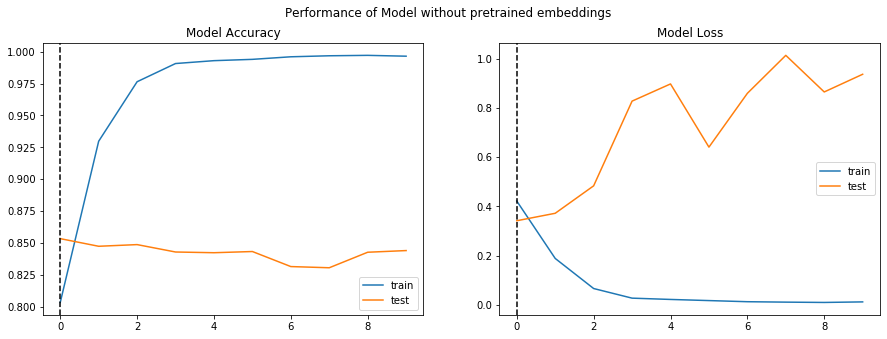

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model without pretrained embeddings")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()